
## [1] K-clustering 구현

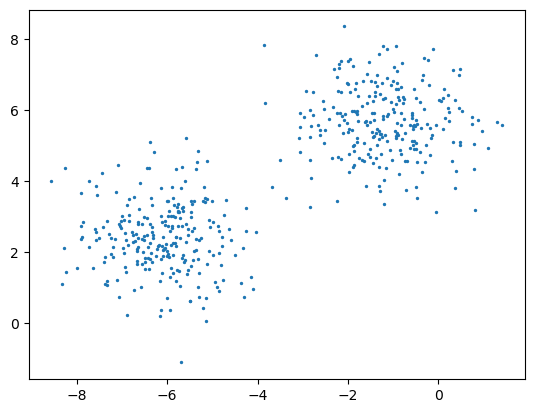

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

X = make_blobs(n_samples=500, centers=2, random_state=1234)[0]
plt.scatter(X[:, 0], X[:, 1], s=2)

In [7]:
centroid_old = X[np.random.randint(X.shape[0], size=2), :]
centroid_old
X

array([[-4.99279854e+00,  1.91783932e+00],
       [-7.90495987e+00,  3.65255913e+00],
       [-7.57084407e-01,  6.29401028e+00],
       [-3.49665829e+00,  4.58107149e+00],
       [-3.05872235e+00,  5.50926091e+00],
       [-8.98453969e-01,  6.58136457e+00],
       [-1.87439619e+00,  5.97568650e+00],
       [-5.99222427e+00,  3.42568815e+00],
       [-5.60387269e+00,  3.98783423e+00],
       [-5.66668547e+00,  1.81077664e+00],
       [-9.35781234e-01,  5.25832299e+00],
       [-2.35063681e+00,  4.65122534e+00],
       [-6.14610641e+00,  2.99595240e+00],
       [-6.87386304e+00,  2.20169288e+00],
       [-4.98766689e+00,  2.83354687e+00],
       [ 9.15869242e-02,  5.46391775e+00],
       [-5.86164214e+00,  2.23367666e+00],
       [-6.56745122e+00,  2.77961307e+00],
       [-6.69423834e+00,  2.51405346e+00],
       [-6.22015068e+00,  2.07816546e+00],
       [-6.52411970e+00,  2.33741430e+00],
       [-5.21713265e+00,  3.43031300e+00],
       [-6.37354386e+00,  2.26000001e+00],
       [-8.

이터레이션: 1, 중심: [[-6.1135271   1.58096684]
 [-2.90878169  4.78340178]]

이터레이션: 2, 중심: [[-6.1550979   2.32910441]
 [-1.3419916   5.62012837]]

이터레이션: 3, 중심: [[-6.11472428  2.40975303]
 [-1.18984097  5.67112071]]

이터레이션: 4, 중심: [[-6.10376937  2.41413748]
 [-1.18110522  5.67979891]]

이터레이션: 5, 중심: [[-6.10376937  2.41413748]
 [-1.18110522  5.67979891]]

이터레이션 5에서 학습 종료



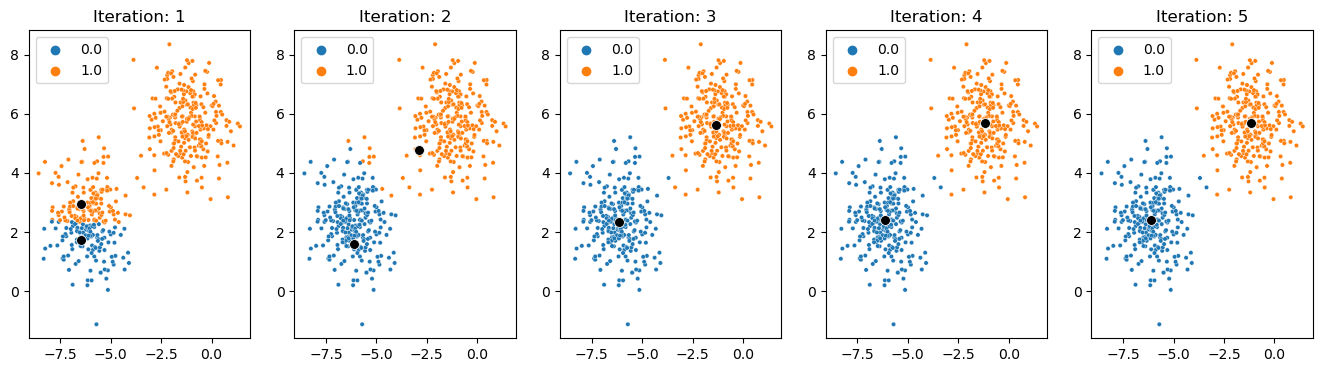

In [8]:
np.random.seed(1234)
cluster = np.zeros(X.shape[0])
centroid_old = X[np.random.randint(X.shape[0], size=2), :]

f = plt.figure(figsize=(20, 4))
for it in range(1, 11):
    for i, row in enumerate(X):
        d = float('inf')
        for ind, centroid in enumerate(centroid_old):
            tmp = np.linalg.norm(centroid - row)
            if d > tmp:
                d = tmp
                cluster[i] = ind
    ax = f.add_subplot(1, 6, it)
    ax.set_title("Iteration: " + str(it))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], s=10, hue=cluster)
    sns.scatterplot(x=centroid_old[:, 0], y=centroid_old[:, 1], s=50, color='k')

    centroid = pd.DataFrame(X).groupby(cluster).mean().values
    print(f'이터레이션: {it}, 중심: {centroid}\n')
    if np.allclose(centroid, centroid_old):
        print(f'이터레이션 {it}에서 학습 종료\n')
        break
    centroid_old = centroid

## [2] sklearn.cluster.KMeans 

In [9]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(f'샘플별 군집 번호: {kmeans.labels_}')

샘플별 군집 번호: [1 1 1 0 0 0]


In [10]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X, y = load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1234)

scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=7, n_init=15, random_state=1234)
kmeans = kmeans.fit(X_train_scaled)
labels = kmeans.predict(X_test_scaled)

X_test['labels'] = labels
X_test['y'] = y_test

X_test.groupby(by='labels').mean()['y'].sort_values()

labels
5     93.714286
0    107.464286
4    153.666667
3    156.689655
6    178.000000
1    207.384615
2    243.642857
Name: y, dtype: float64

In [3]:
from sklearn.metrics import recall_score

clf = MLPClassifier(hidden_layer_sizes=(20, 10),
                    solver='adam',
                    max_iter=1000,
                    random_state=1234,
                    early_stopping=True)

y_pred = clf.fit(X_train, y_train).predict(X_test)

print(f'테스트셋 재현율:{recall_score(y_test, y_pred) * 100: .2f}%')

테스트셋 재현율: 91.43%


## [3] 계층적 군집화 모델 구현

In [19]:
import numpy as np

X = np.array([[1, 0], [1, 3], [0, 1], [4, 9], [3, -2], [-1, 1]])
clusters = [[X[i]] for i in range(len(X))]
print(f'초기 군집: {clusters}')

초기 군집: [[array([1, 0])], [array([1, 3])], [array([0, 1])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1])]]


In [20]:
def dist(A, B):
    val = np.inf
    for a in A:
        for b in B:
            tmp = np.linalg.norm(a - b)
            if tmp < val: val = tmp
    return val

In [21]:
while len(clusters) > 1:
    val = np.inf
    ind1 = -1
    ind2 = -1
    # a > b
    for a in range(len(clusters)):
        for b in range(a):
            tmp = dist(clusters[a], clusters[b])
            if tmp < val:
                val = tmp
                ind1 = a
                ind2 = b
    c1 = clusters.pop(ind1)
    c2 = clusters.pop(ind2)
    
    clusters.append(c1 + c2)
    print(f'단계 {6 - len(clusters)}: {clusters}')

단계 1: [[array([1, 0])], [array([1, 3])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1])]]
단계 2: [[array([1, 3])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1]), array([1, 0])]]
단계 3: [[array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3])]]
단계 4: [[array([4, 9])], [array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3]), array([ 3, -2])]]
단계 5: [[array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3]), array([ 3, -2]), array([4, 9])]]


## [4] AgglomerativeClustering 활용 예시

In [22]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

In [23]:
clustering1 = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)
print(f'군집의 수를 설정한 모델링 결과: {clustering1.labels_}')

군집의 수를 설정한 모델링 결과: [0 0 1 0 0 1]


In [24]:
clustering2 = AgglomerativeClustering(n_clusters=None,
                                      linkage='complete',
                                      distance_threshold=2.5).fit(X)
print(f'군집화 기준 거리를 설정한 모델링 결과: {clustering2.labels_}')

군집화 기준 거리를 설정한 모델링 결과: [2 2 3 0 0 1]


In [25]:
clustering3 = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)
print(f'군집의 수를 4로 설정한 모델링 결과: {clustering3.labels_}')

군집의 수를 4로 설정한 모델링 결과: [2 2 3 0 0 1]


## [5] PCA 구현 예시

In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

X, y = load_iris(return_X_y=True)
X_centered = X - np.mean(X, axis=0)
X_cov = np.cov(X_centered.T)
eigenvalue, eigenvector = np.linalg.eigh(X_cov)

ind = np.argsort(eigenvalue)[::-1]
eigenvalue_sorted = eigenvalue[ind]
eigenvector_sorted = eigenvector[:, ind]
num_components = 2
eigenvector_extracted = eigenvector_sorted[:, :num_components]

X_extracted_eigen = np.dot(eigenvector_extracted.transpose(),
                           X_centered.transpose()).transpose()
print('축소된 피처 행렬의 크기:', X_extracted_eigen.shape, '\n')
print('축소된 피처 행렬의 첫 5개 샘플:\n', X_extracted_eigen[:5, :])

축소된 피처 행렬의 크기: (150, 2) 

축소된 피처 행렬의 첫 5개 샘플:
 [[ 2.68412563  0.31939725]
 [ 2.71414169 -0.17700123]
 [ 2.88899057 -0.14494943]
 [ 2.74534286 -0.31829898]
 [ 2.72871654  0.32675451]]


<Axes: xlabel='PC1', ylabel='PC2'>

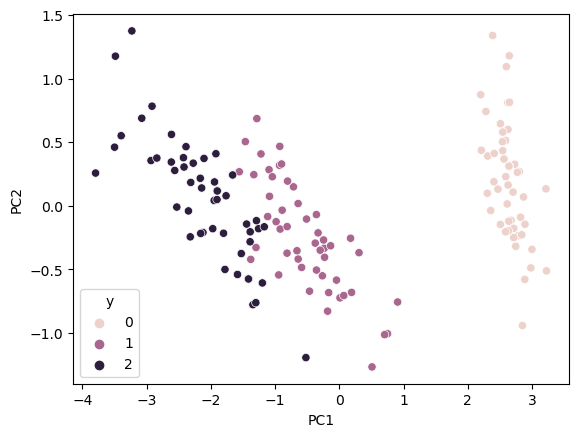

In [27]:
df = pd.DataFrame(X_extracted_eigen, columns=['PC1', 'PC2'])
df['y'] = y

sns.scatterplot(data=df, x='PC1', y='PC2', hue='y')

## [6] SVD를 활용한 구현

<Axes: xlabel='PC1', ylabel='PC2'>

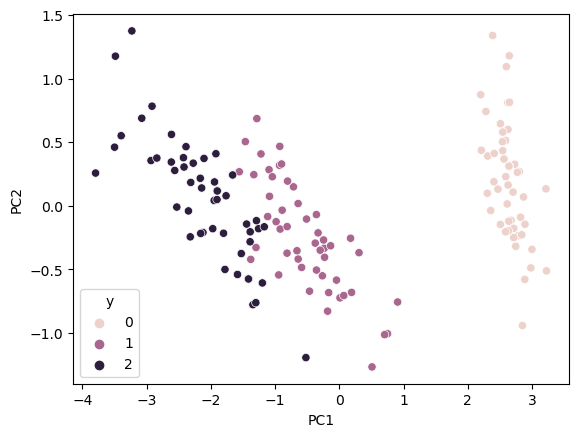

In [28]:
from numpy.linalg import svd

u, s, vh = np.linalg.svd(X_centered)
X_extracted_svd = -(X_centered @ vh.T)[:, :2]
df = pd.DataFrame(X_extracted_svd, columns=['PC1', 'PC2']) 
df['y'] = y

sns.scatterplot(data=df, x='PC1', y='PC2', hue='y')

In [29]:
np.allclose(X_extracted_eigen, X_extracted_svd)

True

## [7] PCA와 로지스틱회귀로 파이프라인 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
%matplotlib inline

X, y = load_digits(return_X_y=True)
scaler = StandardScaler()
pca = PCA(random_state=1234)
logistic = LogisticRegression(max_iter=10000, tol=0.1, random_state=1234)

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic)])
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 60],
    'logistic__C': np.logspace(-4, 4, 4)
}
search = GridSearchCV(pipe, param_grid)
search.fit(X, y)

print('Best parameter (CV score', search.best_score_, '):',
      search.best_params_)

Best parameter (CV score 0.9237759207675642 ): {'logistic__C': 0.046415888336127774, 'pca__n_components': 60}


## [8] 축소기법 비교

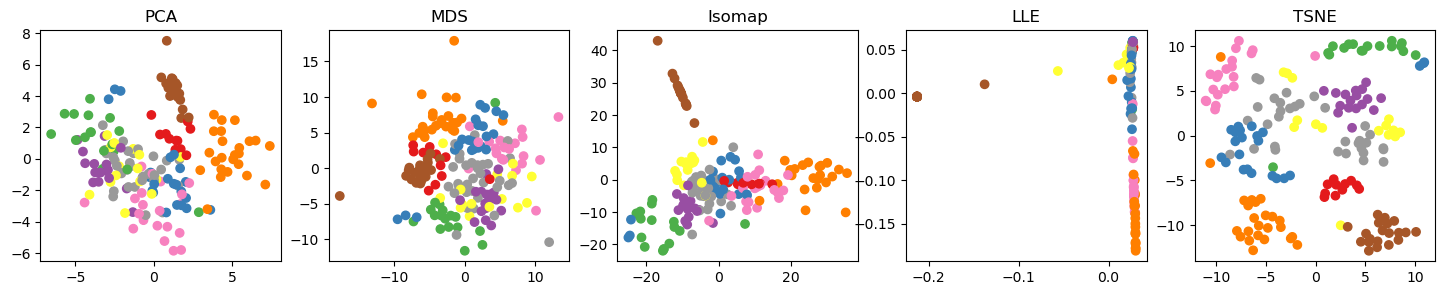

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.pipeline import make_pipeline
%matplotlib inline

df = load_digits(as_frame=True)['frame'].sample(frac=0.1, random_state=1234)
X, y = df.drop(['target'], axis=1), df['target']
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=1234))
mds = make_pipeline(StandardScaler(), MDS(n_components=2, random_state=1234))
isomap = make_pipeline(StandardScaler(), Isomap(n_components=2))
lle = make_pipeline(StandardScaler(),
                    LocallyLinearEmbedding(n_components=2, random_state=1234))
tsne = make_pipeline(StandardScaler(), TSNE(n_components=2, random_state=1234))

methods = [("PCA", pca), ("MDS", mds), ("Isomap", isomap), ("LLE", lle), 
           ("TSNE", tsne)]
fig, axs = plt.subplots(1, 5, figsize=(18, 3))
for i, (name, model) in enumerate(methods):
    X_embedded = model.fit_transform(X)
    axs[i].scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap="Set1")
    axs[i].set_title(name)

## [9] winedata에 PCA 적용

<Axes: >

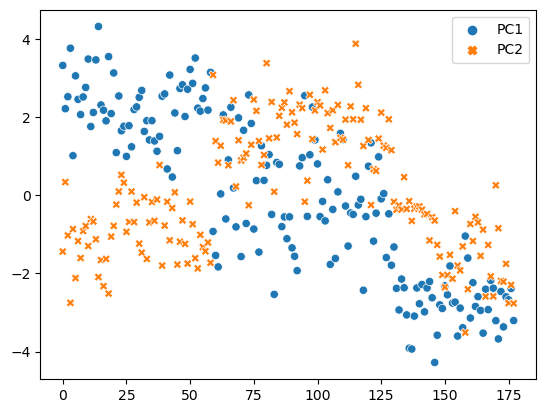

In [38]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

X, _ = load_wine(return_X_y=True)

X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=1234)

X_extracted = pca.fit_transform(X)
X_extracted = pd.DataFrame(X_extracted, columns=['PC1', 'PC2'])

sns.scatterplot(data=X_extracted)

## [10] 4가지 기법을 MNIST에 적용하고, 로지스틱 회귀 적용하기

In [39]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

df = load_digits(as_frame=True)['frame'].sample(frac=0.1, random_state=1234)
X, y = df.drop(['target'], axis=1), df['target']

pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=1234))
mds = make_pipeline(StandardScaler(), MDS(n_components=2, random_state=1234))
isomap = make_pipeline(StandardScaler(), Isomap(n_components=2))
lle = make_pipeline(StandardScaler(), 
                    LocallyLinearEmbedding(n_components=2, random_state=1234))
tsne = make_pipeline(StandardScaler(), TSNE(n_components=2, random_state=1234))

methods = [("PCA", pca), ("MDS", mds), ("Isomap", isomap), ("LLE", lle), 
           ("TSNE", tsne)]

for (name, model) in methods:
    X_transformed = model.fit_transform(X)
    clf = LogisticRegression(random_state=1234).fit(X_transformed, y)
    y_pred = clf.predict(X_transformed)
    
    acc = (y == y_pred).mean() * 100
    print(f'{name} 모델의 정확도: {acc:.2f}%')

PCA 모델의 정확도: 64.44%
MDS 모델의 정확도: 65.56%
Isomap 모델의 정확도: 68.89%
LLE 모델의 정확도: 32.78%
TSNE 모델의 정확도: 82.22%
